In [1]:
import numpy as np
import pandas as pd


import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb


import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [3]:
np.set_printoptions(precision=4, suppress=True)
plt.figure(figsize=(10,3))
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [5]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/mtcars.csv'
cars = pd.read_csv(url)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X = cars.ix[:, (1,3,4,6)].values # select columns we are interested in

y = cars.ix[:, (9)].values

C:\Users\Vlad\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Vlad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [7]:
Z = linkage(X, 'ward')

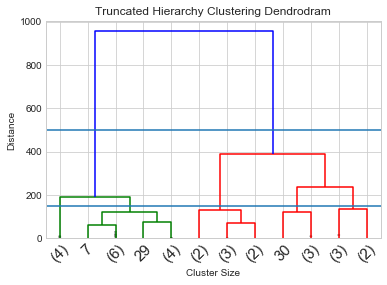

In [10]:
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Truncated Hierarchy Clustering Dendrodram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [13]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [14]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.4375

In [15]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.78125

In [16]:
k=2

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.71875